In [ ]:
"""!pip install numpy
!pip install pandas
!pip install tensorflow
!pip install pillow
!pip install scipy
""" ##libraries for local runtime
!pip install unrar


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!unrar x "/content/drive/MyDrive/PLANTDATAfull/NewPlantDiseasesDatasetFULL.rar"

  OK 
Extracting  New Plant Diseases DatasetFULL/valid/Tomato___Tomato_Yellow_Leaf_Curl_Virus/fe746591-0f79-4175-99d2-ccd3672065a1___UF.GRC_YLCV_Lab 01717.JPG      98%  OK 
Extracting  New Plant Diseases DatasetFULL/valid/Tomato___Tomato_Yellow_Leaf_Curl_Virus/feb114a3-a58f-47b6-b7e8-816ffb06bbc5___YLCV_GCREC 2338.JPG      98%  OK 
Extracting  New Plant Diseases DatasetFULL/valid/Tomato___Tomato_Yellow_Leaf_Curl_Virus/ff2bb757-d8ac-43df-8161-4c2ef1806055___UF.GRC_YLCV_Lab 01758.JPG      98%  OK 
Extracting  New Plant Diseases DatasetFULL/valid/Tomato___Tomato_Yellow_Leaf_Curl_Virus/ff46311d-9868-4313-8834-eaf2f3259b27___UF.GRC_YLCV_Lab 02625.JPG      98%  OK 
Extracting  New Plant Diseases DatasetFULL/valid/Tomato___Tomato_Yellow_Leaf_Curl_Virus/ff8a2419-99e2-4bb8-ba94-691cb9773930___YLCV_GCREC 5393.JPG      98%  OK 
Extracting  New Plant Diseases DatasetFULL/valid/Tomato___Tomato_Yellow_Leaf_Curl_Virus/ff8ddc21-4c78-48cf-b608-50d9e1486

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
image_size = [224, 224]

In [ ]:
from glob import glob
folders = glob('/content/New Plant Diseases DatasetFULL/*') ##if error change folder to     NewPlantDiseasesDatasetFULL

In [ ]:
for i in folders:
  print(i)

/content/New Plant Diseases DatasetFULL/valid
/content/New Plant Diseases DatasetFULL/train


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(
    rescale = 1./255)

train_set = train_data_gen.flow_from_directory(
    '/content/New Plant Diseases DatasetFULL/train',
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical')

##train_set.reset()

##xtr=np.concatenate([train_set.next()[0] for i in range(train_set.__len__())])   ##for numpy array conversion




Found 18345 images belonging to 10 classes.


In [ ]:
test_data_gen = ImageDataGenerator(rescale = 1./255)

test_set = test_data_gen.flow_from_directory(
    '/content/New Plant Diseases DatasetFULL/valid',
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical')

##train_set.reset()

##xts=np.concatenate([test_set.next()[0] for i in range(test_set.__len__())])  ##for numpy array conversion



Found 4585 images belonging to 10 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


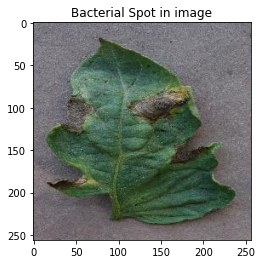

In [ ]:
img_samples = ["1a8bd88f-309f-4392-b387-7cb423ef0ab6___RS_Erly.B 7366.JPG", "1ba88993-c3f8-462d-bd1b-e10819b9c96f___RS_Erly.B 8396.JPG", "1bb0101c-d0a4-41a5-85b9-6e8634d01a36___RS_Erly.B 9585.JPG", "0abc57ec-7f3b-482a-8579-21f3b2fb780b___RS_Erly.B 7609.JPG"]
for i in img_samples:
  pth = "/content/New Plant Diseases DatasetFULL/train/Tomato___Early_blight/" + i
  plt.imshow(plt.imread(pth))
  plt.title(f"Bacterial Spot in image")


In [ ]:
res = ResNet50(input_shape = image_size + [3], weights = 'imagenet', include_top =  False)

for layer in res.layers:
    layer.trainable = False

x = Flatten()(res.output)

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
prediction = Dense(10, activation = 'softmax')(x)   ##dense layer number = number of folders/classes

In [ ]:
model = Model(inputs = res.input, outputs = prediction)
model.summary()

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
    )

In [ ]:
res = model.fit(
    train_set,
    validation_data=test_set,
    epochs = 100
    )

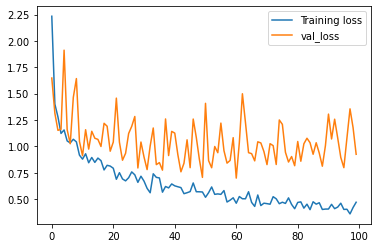

In [ ]:
plt.plot(res.history['loss'], label='Training loss')
plt.plot(res.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


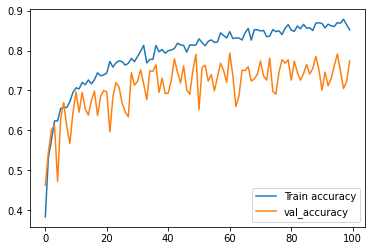

In [ ]:
plt.plot(res.history['accuracy'], label='Train accuracy')
plt.plot(res.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()